# Movie Industry Dataset Analysis

### By: Ethan Goldbeck, Vishal Narayanan, Aldo Peters, Yuxiang Wang

Objective: The movie industry has been one of the largest entertainment factors for audiences since movie making began. In the past 20 years, 3527 movies have released in the United States. With further advances in technology and movie making, this number should only increase as more ground breaking films are in production. When analyzing the success of a movie, many individuals, companies, and fans are often involved. This report aims to analyze the different variables that exist in our dataset and their impact on films in the past 20 years. 

In [138]:
import seaborn as sns

import numpy as np

import pandas as pd

import matplotlib.pylab as plt

from scipy import stats

**Data Cleaning and structuring**

Before beginning our analysis, we started by cleaning and structuring our data in order to get a better understaning of the variables we wanted to analyze. The first step was filtering out our data to only include the last 20 years of movies, as our goal was to analyze the trends that occured in the movie industry in the past 20 years. Next, we proceeded by dropping a few columns such as writer, votes, and release, as they did not have as much impact on films as the other categories in our dataset. Finally, we divided both budget and gross amounts by $1,000,000 to get our numbers in the hundreds/tens unit for better analysis. The gross amount was then rounded up for all films. 

In [139]:
movies = pd.read_csv('movies.csv')
movies['released'] = pd.to_datetime(movies.released)
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [140]:
movies.drop(['writer','votes','released'], axis=1, inplace=True)
movies.drop(movies.index[:2202], inplace=True)
movies.dropna(inplace=True)
movies.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year
2202,7000000,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,24611975,Fargo,R,98,8.1,William H. Macy,1996
2203,14000000,Dimension Films,USA,Wes Craven,Horror,103046663,Scream,R,111,7.2,Neve Campbell,1996
2204,19000000,Dimension Films,USA,Robert Rodriguez,Action,25753840,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996
2205,75000000,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306169255,Independence Day,PG-13,145,7.0,Will Smith,1996
2206,14500000,Bazmark Films,USA,Baz Luhrmann,Drama,46351345,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996


Dropped three columns (writer, released, votes) that we will not use in this project

In [141]:
movies =movies[~movies ['budget'].isin([0])]
movies['budget'].isnull()[2202:6821]
movies.dropna(inplace=True)  
movies.head(100)

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year
2202,7000000,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,24611975,Fargo,R,98,8.1,William H. Macy,1996
2203,14000000,Dimension Films,USA,Wes Craven,Horror,103046663,Scream,R,111,7.2,Neve Campbell,1996
2204,19000000,Dimension Films,USA,Robert Rodriguez,Action,25753840,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996
2205,75000000,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306169255,Independence Day,PG-13,145,7.0,Will Smith,1996
2206,14500000,Bazmark Films,USA,Baz Luhrmann,Drama,46351345,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996
2207,36000000,TriStar Pictures,USA,Danny DeVito,Comedy,33084249,Matilda,PG,98,6.8,Danny DeVito,1996
2208,12000000,Universal Pictures,USA,Dennis Dugan,Comedy,38624000,Happy Gilmore,PG-13,92,7.0,Adam Sandler,1996
2209,3000000,NDF International,USA,Mira Nair,Crime,4109095,Kama Sutra: A Tale of Love,R,117,6.0,Naveen Andrews,1996
2210,44000000,Astoria Films,USA,Barry Levinson,Crime,49100000,Sleepers,R,147,7.6,Robert De Niro,1996
2211,27000000,Miramax,USA,Anthony Minghella,Drama,78651430,The English Patient,R,162,7.4,Ralph Fiennes,1996


Dropped earlier movies we are not using

In [142]:
movies.budget = movies.budget/1000000
movies.gross = (movies.gross/1000000).round()
movies.head(100)


,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year
2202,7.00,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,25.0,Fargo,R,98,8.1,William H. Macy,1996
2203,14.00,Dimension Films,USA,Wes Craven,Horror,103.0,Scream,R,111,7.2,Neve Campbell,1996
2204,19.00,Dimension Films,USA,Robert Rodriguez,Action,26.0,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996
2205,75.00,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306.0,Independence Day,PG-13,145,7.0,Will Smith,1996
2206,14.50,Bazmark Films,USA,Baz Luhrmann,Drama,46.0,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996
2207,36.00,TriStar Pictures,USA,Danny DeVito,Comedy,33.0,Matilda,PG,98,6.8,Danny DeVito,1996
2208,12.00,Universal Pictures,USA,Dennis Dugan,Comedy,39.0,Happy Gilmore,PG-13,92,7.0,Adam Sandler,1996
2209,3.00,NDF International,USA,Mira Nair,Crime,4.0,Kama Sutra: A Tale of Love,R,117,6.0,Naveen Andrews,1996
2210,44.00,Astoria Films,USA,Barry Levinson,Crime,49.0,Sleepers,R,147,7.6,Robert De Niro,1996
2211,27.00,Miramax,USA,Anthony Minghella,Drama,79.0,The English Patient,R,162,7.4,Ralph Fiennes,1996


Made budget and gross columns in millions (gross is rounded).

**What are the top Companies that have dominated the market in the past 20 years?**

In [143]:
moviecount = movies.groupby('company', as_index=False).agg({'name':'count', 'gross':'sum'}).sort_values(by='name', ascending=False).head(10)
moviecount

,company,name,gross
979,Universal Pictures,204,15645.0
997,Warner Bros.,196,16650.0
779,Paramount Pictures,151,12586.0
965,Twentieth Century Fox Film Corporation,140,12286.0
731,New Line Cinema,118,7597.0
310,Columbia Pictures,105,8784.0
311,Columbia Pictures Corporation,86,5437.0
382,DreamWorks,74,5406.0
996,Walt Disney Pictures,74,8639.0
954,Touchstone Pictures,67,4043.0


In [144]:
topcompanies = movies.groupby('company', as_index=False).agg({'name':'count', 'gross':'sum'}).sort_values(by='name', ascending=False).head(10)
topcompanies

,company,name,gross
979,Universal Pictures,204,15645.0
997,Warner Bros.,196,16650.0
779,Paramount Pictures,151,12586.0
965,Twentieth Century Fox Film Corporation,140,12286.0
731,New Line Cinema,118,7597.0
310,Columbia Pictures,105,8784.0
311,Columbia Pictures Corporation,86,5437.0
382,DreamWorks,74,5406.0
996,Walt Disney Pictures,74,8639.0
954,Touchstone Pictures,67,4043.0


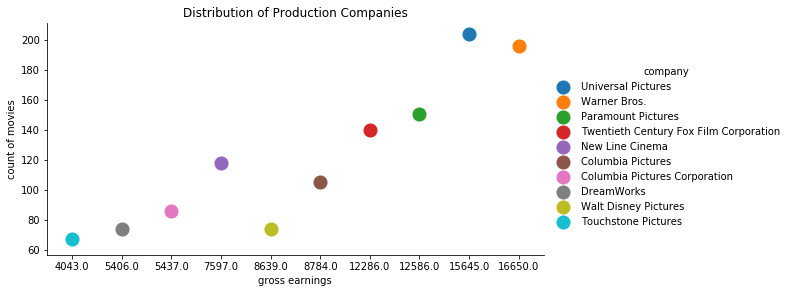

In [145]:
company = sns.catplot(x='gross',y='name',data=topcompanies,hue='company',kind='point',height=4,aspect=2,scale=1.6)
company.set(xlabel='gross earnings', ylabel='count of movies', title='Distribution of Production Companies')
company

Based on the analysis above, companies like Universal Pictures, Warner Bros, and Paramount pictures have dominated the market in the past 20 years in terms of both money and movies produced. The graph depicted shows where the top companies are in comparison to other companies, most notably Walt Disney Pictures, one of the largest entertainment conglomerates across the world. These companies are producing popular series such as Jurrasic Park/World (Universal studios), the Harry Potter & Batman series (Warner Bros.), and the Mission impossible series (Paramount). With the revenue and popularity that these movies have achieved, the companies are able to expand their operations beyond movie making by building theme parks and attractions, giving fans a true movie experience outside the cinema halls.

**Calculating return on investment for films**

Return on Investment for films was calculated by subtracting the gross amount from the budget amount, and then dividing it by budget. After finding the ROI percentages, a new ROI column was created which shows the return for all movies in our dataset.

In [146]:
ROI = (movies.gross-movies.budget)/movies.budget*100

Define ROI (return on investment) in %

In [147]:
movies['ROI'] = ROI

Add column ROI to dataframe movies

**Who are the popular stars according to budget? Did a company's investments pay off?**

In [148]:
popularstar = movies.groupby('star', as_index=False).agg({'budget':'sum', 'ROI':'sum'}).sort_values(by='budget', ascending=False).head(10)
popularstar

,star,budget,ROI
612,Johnny Depp,2322.5,-51.091553
1187,Tom Cruise,1954.0,484.046320
908,Nicolas Cage,1935.0,-826.539693
1241,Will Smith,1848.1,897.882834
1190,Tom Hanks,1683.0,1083.239053
106,Ben Stiller,1656.0,1774.491558
12,Adam Sandler,1617.2,2286.601908
156,Bruce Willis,1603.3,250.412931
812,Matt Damon,1562.2,235.337131
295,Denzel Washington,1488.5,1175.686390


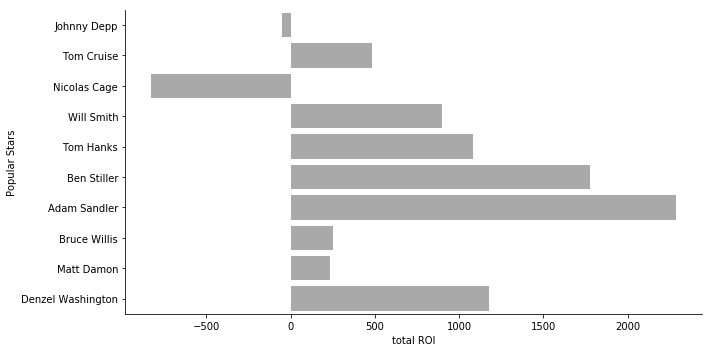

In [149]:
stars = sns.catplot(x='ROI',y='star', data=popularstar, kind='bar', color='darkgrey',aspect = 2,capsize=0)
stars.set(xlabel='total ROI', ylabel='Popular Stars')
stars

To determine if high budgeted stars had good returns on their films, we calculated the total budget that was allocated to them for all films. After doing so, we summed the total ROI as well for their movies. The analysis above shows the top 10 stars that had the highest budgets allocated to them. Surprisingly, popular stars like Jonnny Depp and Nicolas Cage had high budgets allocated to them, but had an overall negative return. All other stars proved to be profitable based on their overall budgets, with Adam Sandler leading the race. 

In [150]:
movies.loc[movies['ROI'] <=0,'MovieRank'] = 'Flop'
movies.loc[movies['ROI'] >=1,'MovieRank'] = 'Average'
movies.loc[movies['ROI'] >=20,'MovieRank'] = 'Above-Average'
movies.loc[movies['ROI'] >=50,'MovieRank'] = 'Hit'
movies.loc[movies['ROI'] >=100,'MovieRank'] = 'Super-Hit'
movies.loc[movies['ROI'] >=300,'MovieRank'] = 'Blockbuster'
movies

Rank = movies.iloc[:,[6,11,13]].groupby('MovieRank', as_index=False).agg({'name':'count'})
Rank

,MovieRank,name
0,Above-Average,305
1,Average,221
2,Blockbuster,277
3,Flop,1892
4,Hit,326
5,Super-Hit,505


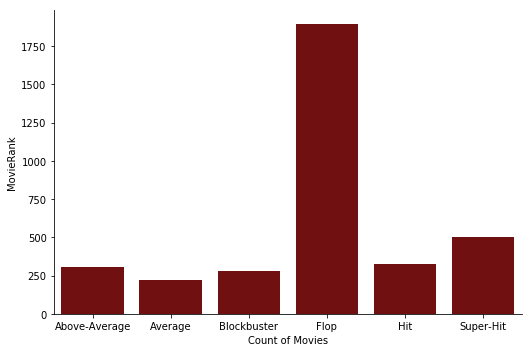

In [151]:
MovieRankplot = sns.catplot(x='MovieRank', y='name',data=Rank, color='maroon',kind='bar', aspect=1.5)
MovieRankplot.set(xlabel='Count of Movies', ylabel='MovieRank')
MovieRankplot

In [152]:
movies.iloc[:,[9,13]].groupby('MovieRank')['score'].mean()

MovieRank
Above-Average    6.500656
Average          6.467421
Blockbuster      6.673285
Flop             6.207928
Hit              6.496626
Super-Hit        6.585347
Name: score, dtype: float64

After finding the return on investment for each film, we categorized films based on their return and added a new column in our dataset. Movies that had a negative return were considered flops, whereas movies with positive returns were given the ranks (Average, Above Average, Hit, Super-Hit, and blockbuster). A new column was added at the end to show the Movie rank for each movie. The counts below display how many movies belong to each category. Surprisingly, 53% of movies in our dataset had negative returns and were considered flops by the box office. The most common positive rank that occurred was Super-Hit, with a total of 505 movies. The average score for these movie categories was also measured, showing a slight exponential increase as movies increase in ranks. 

**Did the highest budgeted films pay off for producers?**

In [153]:
moviebudget = movies.iloc[:,[0,5,6,12,13]].sort_values(by='budget', ascending=False).head(20)
moviebudget

,budget,gross,name,ROI,MovieRank
4631,300.0,309.0,Pirates of the Caribbean: At World's End,3.000000,Average
5293,260.0,201.0,Tangled,-22.692308,Flop
4637,258.0,337.0,Spider-Man 3,30.620155,Above-Average
6624,250.0,408.0,Captain America: Civil War,63.200000,Hit
6398,250.0,459.0,Avengers: Age of Ultron,83.600000,Hit
6619,250.0,330.0,Batman v Superman: Dawn of Justice,32.000000,Above-Average
5720,250.0,448.0,The Dark Knight Rises,79.200000,Hit
5065,250.0,302.0,Harry Potter and the Half-Blood Prince,20.800000,Above-Average
5502,250.0,241.0,Pirates of the Caribbean: On Stranger Tides,-3.600000,Flop
5757,250.0,73.0,John Carter,-70.800000,Flop


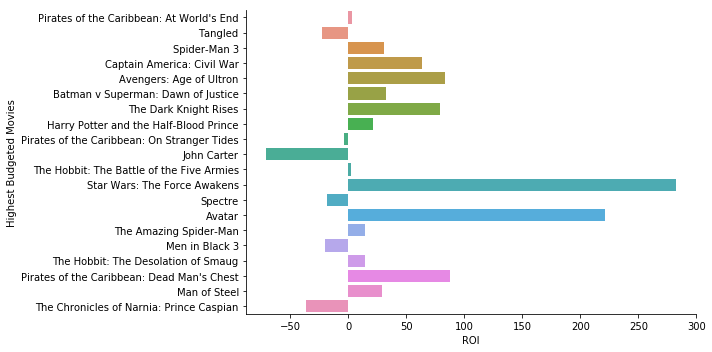

In [154]:
MovieBudgetplot = sns.catplot(x='ROI',y='name', data=moviebudget, kind='bar', aspect = 2,capsize=0)
MovieBudgetplot.set(xlabel='ROI', ylabel='Highest Budgeted Movies')
MovieBudgetplot

In [155]:
moviebudget.groupby('MovieRank').agg({'name':'count'})

,name
MovieRank,
Above-Average,4
Average,4
Flop,6
Hit,4
Super-Hit,2


To determine if the highest budgeted films paid off for producers, we found the top 20 films with the highest budget, and measured their returns. The graph above shows that having a high budget doesn't always pay off for producers. For example, Pirates of the Carribean was one of the most popular film series produced by Walt Disney, however as the budgets increased per movie, the company was unable to generate a decent profit on their last 2 films, with the most recent one being a box office flop. Movies towards the end of our list, such as Avatar and Star wars, became Super-Hits at the box office and was well received by the audience. The MovieRanks for the high budgeted movies are shown above, and suprisingly there were more box office flops than any other category. 

In [156]:
profit = movies.gross-movies.budget
profit

2202     18.00
2203     89.00
2204      7.00
2205    231.00
2206     31.50
2207     -3.00
2208     27.00
2209      1.00
2210      5.00
2211     52.00
2212    104.00
2213     10.00
2214    101.00
2215     26.00
2216     10.00
2217     59.00
2219     69.00
2220    -32.00
2221     13.00
2222    -16.00
2223     93.00
2224    -12.00
2225      0.00
2226    -18.00
2227      0.00
2228     23.11
2229     47.00
2230     -7.00
2231      2.00
2232      9.00
         ...  
6769     17.00
6770    -12.00
6771     -6.00
6775     -8.00
6777    -10.00
6778      7.50
6779     16.00
6780    -26.00
6781    -15.00
6782    -10.00
6785    -19.50
6786      6.00
6787     49.00
6789     34.00
6790     -8.00
6792     -0.13
6793     -7.00
6794      8.10
6796    -13.00
6797     -6.00
6798    -20.00
6799     42.00
6800     25.00
6803      0.00
6807      7.00
6808     11.00
6809     -2.80
6811     11.50
6814     17.00
6817      0.50
Length: 3527, dtype: float64

In [157]:
movies["profit"] = profit

In [158]:
movies['profit'] = profit



In [159]:
topprofit = movies.groupby('name', as_index=False).agg({"profit": "sum"})

In [160]:
top10profit = topprofit.sort_values('profit', axis=0, ascending=False).head(10)

In [161]:
top10profit

,name,profit
2383,Star Wars: The Force Awakens,692.0
267,Avatar,524.0
1386,Jurassic World,502.0
3229,Titanic,459.0
2542,The Avengers,366.0
2379,Star Wars: Episode I - The Phantom Menace,360.0
2657,The Dark Knight,350.0
2983,The Passion of the Christ,341.0
2128,Rogue One,332.0
2799,The Hunger Games,330.0


Defined profit and created a column profit.  Took a look at the top 10 profiting movies

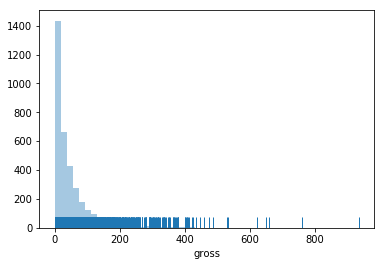

In [162]:
sns.distplot(movies.gross, kde=False, rug=True)

Distribution of movies by gross - most movies gross under $200 mil

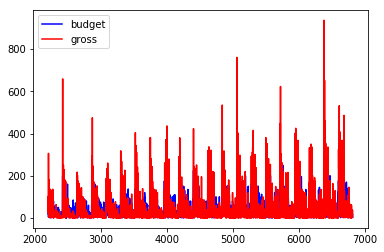

In [163]:
plt.plot(movies.budget,'b') # r for "red" 
plt.plot(movies.gross,'r')  # b for "blue"
plt.legend(loc=2)
plt.show()

Plot of gross (red) vs budget (blue). We can see that most movies are profitable.  This makes a lot of sense because we know the movie industry is profitable in general.

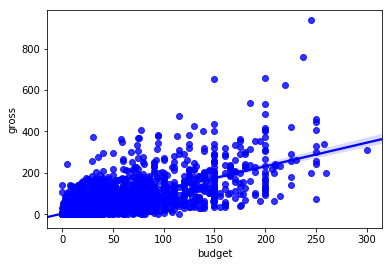

In [164]:
sns.regplot(x=movies['budget'], y=movies['gross'], color='blue')

Regression plot showing budget compared to gross.  In general, bigger budgeted movies make more money.  However, the correlation is not as strong as we would have thought.

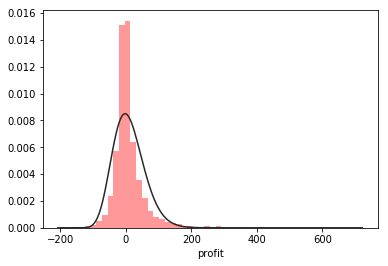

In [167]:
sns.distplot(movies.profit, kde=False, fit=stats.beta, color='red')

Distribution of profits.  More negative profits than we thought but still skewed towards profitability

In [168]:
cor = movies.corr()
cor.stack()

budget   budget     1.000000
         gross      0.693683
         runtime    0.325960
         score      0.076315
         year       0.108296
         ROI       -0.024871
         profit     0.118107
gross    budget     0.693683
         gross      1.000000
         runtime    0.264462
         score      0.218133
         year       0.111218
         ROI        0.023148
         profit     0.797168
runtime  budget     0.325960
         gross      0.264462
         runtime    1.000000
         score      0.425251
         year       0.023297
         ROI       -0.030713
         profit     0.091367
score    budget     0.076315
         gross      0.218133
         runtime    0.425251
         score      1.000000
         year       0.082403
         ROI        0.001255
         profit     0.236756
year     budget     0.108296
         gross      0.111218
         runtime    0.023297
         score      0.082403
         year       1.000000
         ROI       -0.003608
         profi

Rundown of correlations so far - not many strong correlations

In [169]:
movies.genre.unique()

array(['Crime', 'Horror', 'Action', 'Drama', 'Comedy', 'Animation',
       'Biography', 'Adventure', 'Fantasy', 'Sci-Fi', 'Family', 'Mystery',
       'Romance', 'Thriller', 'Western'], dtype=object)

Gives us the different genres in the data set

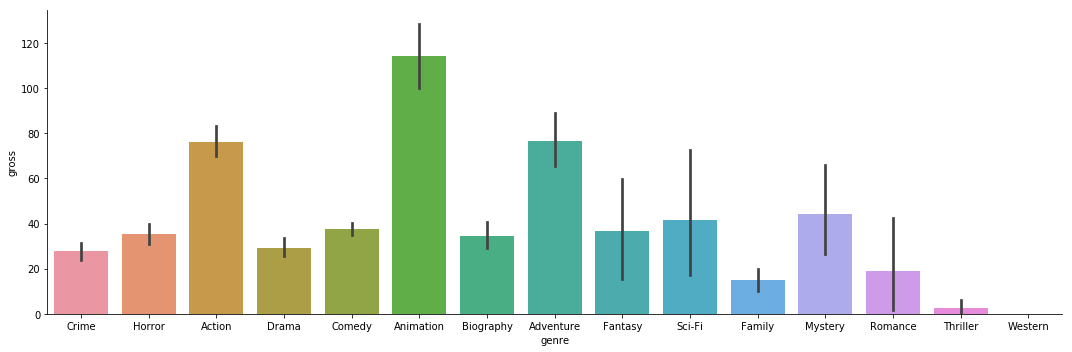

In [170]:
sns.catplot(y='gross', x='genre', data=movies, kind ='bar', height=5, aspect=3)

Highest grossing genres are anamation, adventure, and action

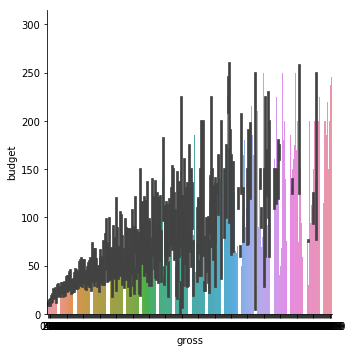

In [171]:
sns.catplot(y='budget', x='gross', data=movies, kind ='bar', height=5, aspect=1)

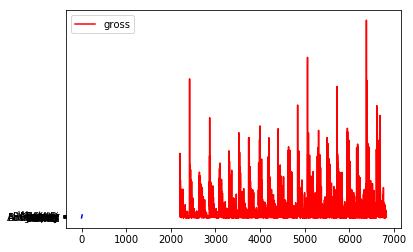

In [172]:
plt.plot(movies.gross,'r') # r for "red" 
plt.plot(movies.genre.unique(),'b')  # b for "blue"
plt.legend(loc=2)
plt.show()

In [173]:
movies_cleaned = movies[movies['ROI']<2000]

There were some ROI values that skewed the data too much so we removed them in order to view ROI in a more managable way

In [174]:
outliers = movies[movies['ROI']>2000]

We still want to look at the outliers as well, now we can.

In [175]:
star = movies_cleaned.groupby('star', as_index=False).agg({"gross": "sum"})

In [176]:
name = movies_cleaned.groupby('name', as_index=False).agg({"gross": "sum"})

In [177]:
director = movies_cleaned.groupby('director', as_index=False).agg({"gross": "sum"})

In [178]:
director10 = director.sort_values('gross', axis=0, ascending=False).head(10)

In [179]:
directorroi = movies_cleaned.groupby('director', as_index=False).agg({"ROI": "mean"})

In [180]:
directorroi10 = directorroi.sort_values('ROI', axis=0, ascending=False).head(10)

In [181]:
star10 = star.sort_values('gross', axis=0, ascending=False).head(10)

In [182]:
name10 = name.sort_values('gross', axis=0, ascending=False).head(10)

In [183]:
star10

,star,gross
998,Robert Downey Jr.,2671.0
1177,Tom Hanks,2619.0
1227,Will Smith,2587.0
12,Adam Sandler,2462.0
106,Ben Stiller,2429.0
605,Johnny Depp,2373.0
1174,Tom Cruise,2346.0
737,Leonardo DiCaprio,2303.0
260,Daniel Radcliffe,2157.0
855,Mike Myers,1869.0


The above code groups star, director, and name(movie name) by total gross.  Director is also grouped by ROI.  For each group we grabbed the top ten and put them into a new dataframe from vizualization.

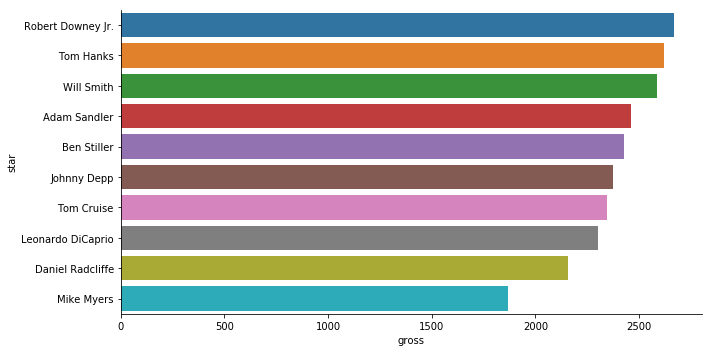

In [184]:
sns.catplot(y="star", x="gross", data=star10, kind="bar", aspect=2)

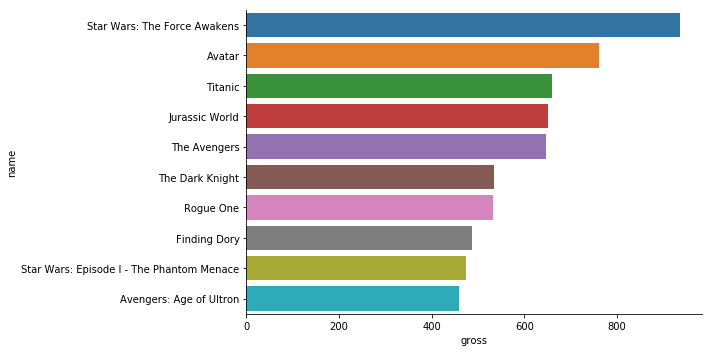

In [185]:
sns.catplot(y="name", x="gross", data=name10, kind="bar", aspect=2)

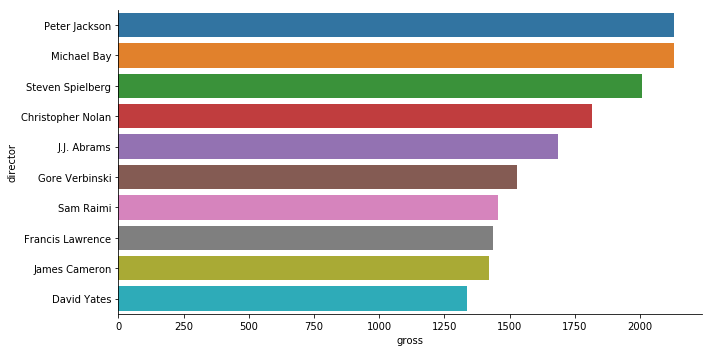

In [186]:
sns.catplot(y="director", x="gross", data=director10, kind="bar", aspect=2)

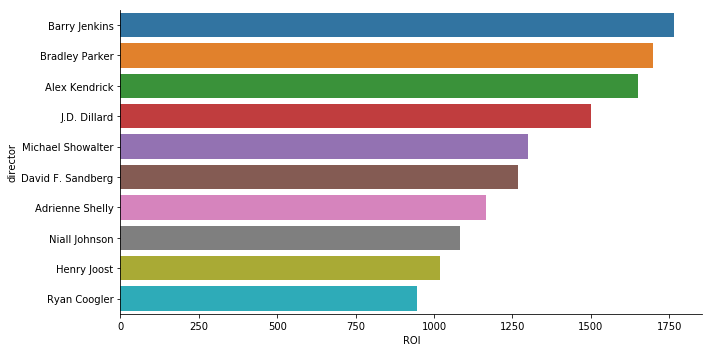

In [187]:
sns.catplot(y="director", x="ROI", data=directorroi10, kind="bar", aspect=2)

Above are the top ten visualizations.  Most are straightfoward (big name actors/movies on top gross), but when we gorup directors by ROI we get many unknown directors.  However, when we look at directors by total gross we can see much more recognizable names (Peter Jackson, Steven Speilberg, etc...).  This is because some smaller budgeted, lesser known movies have had big ROIs.

In [188]:
movies.groupby('genre').mean()

,budget,gross,runtime,score,year,ROI,profit
genre,,,,,,,
Action,70.813884,76.240537,111.748474,6.179609,2006.863248,7.691626,5.426653
Adventure,58.583945,76.500000,112.458716,6.433028,2006.908257,161.329917,17.916055
Animation,84.189706,114.348039,92.455882,6.669118,2007.313725,46.046656,30.158333
Biography,26.880754,34.698492,119.477387,7.085930,2007.844221,47.924852,7.817739
Comedy,26.460886,37.521156,101.660475,6.085243,2005.077399,109.392510,11.060270
Crime,26.763200,27.721805,112.406015,6.762030,2004.921053,16.493298,0.958604
Drama,26.277878,29.335494,114.256078,6.719287,2005.980551,96.015654,3.057616
Family,20.265000,15.000000,97.500000,5.550000,2000.000000,-27.497062,-5.265000
Fantasy,31.083333,36.833333,101.250000,6.100000,2003.416667,15.044993,5.750000


Movies grouped by genre - ROI is too skewed

In [189]:
movies_cleaned.groupby('genre').mean().round()

,budget,gross,runtime,score,year,ROI,profit
genre,,,,,,,
Action,71.0,76.0,112.0,6.0,2007.0,8.0,5.0
Adventure,59.0,77.0,113.0,6.0,2007.0,43.0,18.0
Animation,84.0,114.0,92.0,7.0,2007.0,46.0,30.0
Biography,27.0,35.0,119.0,7.0,2008.0,48.0,8.0
Comedy,27.0,37.0,102.0,6.0,2005.0,74.0,11.0
Crime,27.0,28.0,112.0,7.0,2005.0,9.0,1.0
Drama,27.0,29.0,114.0,7.0,2006.0,41.0,3.0
Family,20.0,15.0,98.0,6.0,2000.0,-27.0,-5.0
Fantasy,31.0,37.0,101.0,6.0,2003.0,15.0,6.0


In [192]:
movies_cleaned.loc[movies['country'] =='USA','domestic'] = 1

movies_cleaned.loc[movies['country'] !='USA','domestic'] = 0

Add a column domestic that is 1 for domestic movies and 0 for international movies.  This will allow us to compare the domestic market against the international market.

In [193]:
movies_cleaned.groupby('domestic')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
domestic,,,,,,,,
0.0,743.0,2006.839838,5.965528,1996.0,2002.0,2007.0,2012.0,2016.0
1.0,2760.0,2005.964855,5.958586,1996.0,2001.0,2006.0,2011.0,2016.0


Is the international market newer?  Maybe slightly but we'll assume this is negligable.

In [194]:
movies_cleaned.groupby('domestic').mean()

,budget,gross,runtime,score,year,ROI,profit
domestic,,,,,,,
0.0,33.599563,32.283984,110.851952,6.627456,2006.839838,6.501742,-1.315579
1.0,44.131254,55.871739,107.249275,6.296486,2005.964855,59.526470,11.740485


Compare domestic and international movies

Cleaner version of the above describe function - Horror movies have highest ROI but Anamation has the highest gross per movie.

In [195]:
movies_cleaned.loc[movies.runtime>=104, "Long"] = 1
movies_cleaned.loc[movies.runtime<104, "Long"] = 0

Insert a column called Long that separates movies into longer (1) or shorter(0) movies. 104 was the median runtime.

In [196]:
movies_cleaned.groupby('Long').mean()

,budget,gross,runtime,score,year,ROI,profit,domestic
Long,,,,,,,,
0.0,32.373202,39.157518,94.352029,5.987589,2005.924224,59.590393,6.784316,0.808473
1.0,50.634511,61.611932,120.545703,6.714450,2006.357964,37.903860,10.977421,0.769020


Take a look at long vs short movies

In [197]:
movies_cleaned.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year,ROI,MovieRank,profit,domestic,Long
2202,7.0,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,25.0,Fargo,R,98,8.1,William H. Macy,1996,257.142857,Super-Hit,18.0,1.0,0.0
2203,14.0,Dimension Films,USA,Wes Craven,Horror,103.0,Scream,R,111,7.2,Neve Campbell,1996,635.714286,Blockbuster,89.0,1.0,1.0
2204,19.0,Dimension Films,USA,Robert Rodriguez,Action,26.0,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996,36.842105,Above-Average,7.0,1.0,1.0
2205,75.0,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306.0,Independence Day,PG-13,145,7.0,Will Smith,1996,308.000000,Blockbuster,231.0,1.0,1.0
2206,14.5,Bazmark Films,USA,Baz Luhrmann,Drama,46.0,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996,217.241379,Super-Hit,31.5,1.0,1.0


Just a reminder of what we have so far

In [198]:
movies_cleaned.loc[movies['budget'] < 15,'Indie'] = 1
movies_cleaned.loc[movies['budget'] >=15,'Indie'] = 0

Add a column called Indie (Indie movie is a low budget movie).  Defined Indie as movies below $15 mil budget

In [199]:
movies_cleaned.groupby('Indie').mean()

,budget,gross,runtime,score,year,ROI,profit,domestic,Long
Indie,,,,,,,,,
0.0,55.512829,65.707259,110.337168,6.329433,2006.145577,23.918402,10.194430,0.813169,0.580325
1.0,6.943886,12.774949,102.047862,6.462322,2006.162933,110.820325,5.831063,0.723014,0.370672


Take a look at Indie vs big budget. Obviously budget is much higher in big budget movies.  Indie movies tend to be shorter and have a higher ROI.

In [200]:
len(outliers)

24

How many ROI outliers did we have/remove (24)

In [201]:
outliers

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year,ROI,MovieRank,profit
2228,0.890,Miramax,USA,Billy Bob Thornton,Drama,24.0,Sling Blade,R,135,8.0,Billy Bob Thornton,1996,2596.629213,Blockbuster,23.110
2246,0.200,Doug Liman Productions,USA,Doug Liman,Comedy,5.0,Swingers,R,96,7.3,Vince Vaughn,1996,2400.000000,Blockbuster,4.800
2478,0.250,Too Askew Prod. Inc.,USA,Kevin Smith,Comedy,12.0,Chasing Amy,R,113,7.3,Ben Affleck,1997,4700.000000,Blockbuster,11.750
2599,0.025,Alliance Atlantis Communications,Canada,Neil LaBute,Comedy,3.0,In the Company of Men,R,97,7.3,Aaron Eckhart,1997,11900.000000,Blockbuster,2.975
2647,0.060,Harvest Filmworks,USA,Darren Aronofsky,Drama,3.0,Pi,R,84,7.5,Sean Gullette,1998,4900.000000,Blockbuster,2.940
2885,0.060,Haxan Films,USA,Daniel Myrick,Horror,141.0,The Blair Witch Project,R,81,6.4,Heather Donahue,1999,234900.000000,Blockbuster,140.940
3417,1.700,Good Machine,USA,Todd Field,Crime,36.0,In the Bedroom,R,130,7.5,Tom Wilkinson,2001,2017.647059,Blockbuster,34.300
3554,5.000,Gold Circle Films,Canada,Joel Zwick,Comedy,241.0,Casarse... est� en griego,PG,95,6.6,Nia Vardalos,2002,4720.000000,Blockbuster,236.000
3806,0.120,Plunge Pictures LLC,USA,Chris Kentis,Adventure,31.0,Open Water,R,79,5.7,Blanchard Ryan,2003,25733.333333,Blockbuster,30.880
3961,1.200,Evolution Entertainment,USA,James Wan,Horror,56.0,Saw,R,103,7.7,Cary Elwes,2004,4566.666667,Blockbuster,54.800


Checking out the outliers - especially Paranormal Activity (719900% ROI)!

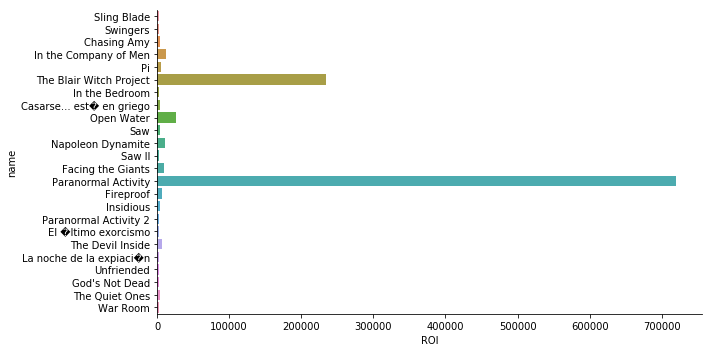

In [202]:
sns.catplot(x="ROI",y='name',data=outliers,kind='bar', aspect=2)

Visual of ROI of outliers.  Even among other outliers PA stands out

In [203]:
para = movies[movies['name']=="Paranormal Activity"]

In [204]:
para

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year,ROI,MovieRank,profit
4683,0.015,Solana Films,USA,Oren Peli,Horror,108.0,Paranormal Activity,R,86,6.3,Katie Featherston,2007,719900.0,Blockbuster,107.985


Definie and view para which is just the movie Paranormal activity. $.015Mil Budget grossing $108Mil.

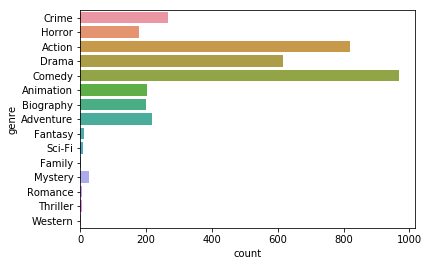

In [205]:
sns.countplot(y=movies['genre'])

Count by genre. Assumption - the low counts (fantasy - western) probably accounts for the fact that each movie in this only gets one genre.  Perhaps most westerns are categorized as action/crime movies here and most family movies are categorized as comedies/animation

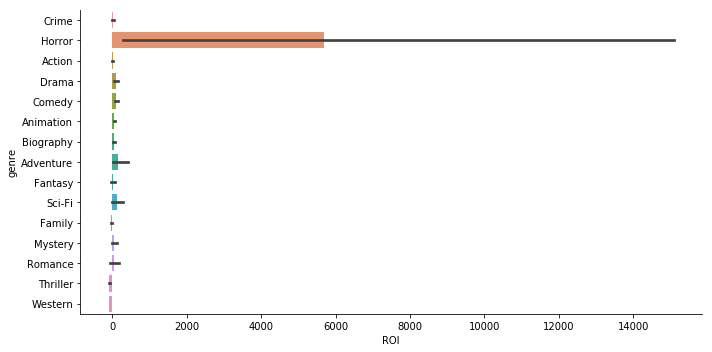

In [206]:
sns.catplot(x="ROI",y='genre',data=movies,kind='bar', aspect=2)

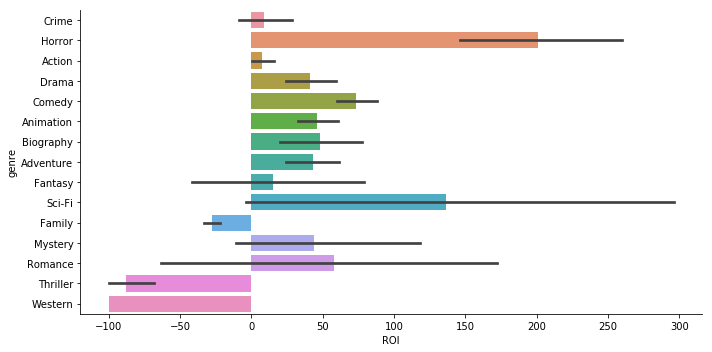

In [207]:
sns.catplot(x="ROI",y='genre',data=movies_cleaned,kind='bar', aspect=2)

Must used cleaned date - the negative ROIs have to do with the extremely low movie count probably not useful information.  Crime - adventure has useful ROI ranges for these genres.

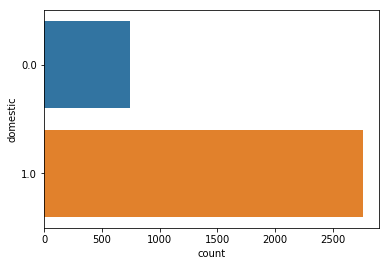

In [208]:
sns.countplot(y=movies_cleaned['domestic'])

How many domestic/international movies are in this dataset

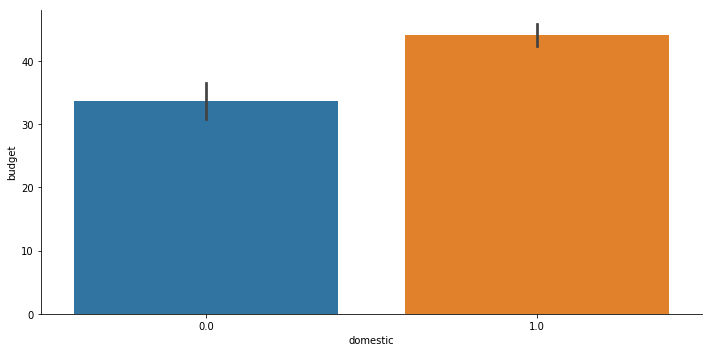

In [209]:
sns.catplot(x="domestic",y='budget',data=movies_cleaned,kind='bar', aspect=2)

View of budgets of domestic vs international.  Domestic movies are more expensive but similar

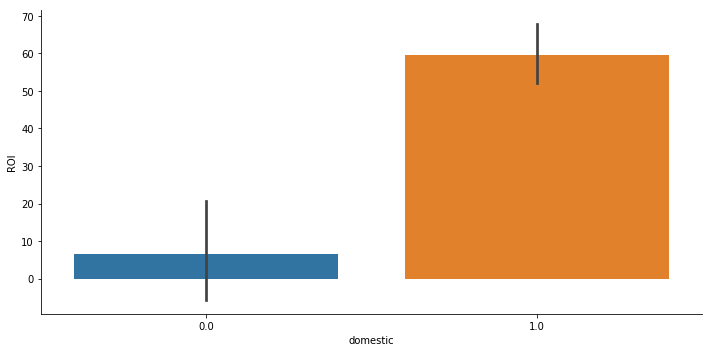

In [210]:
sns.catplot(x="domestic",y='ROI',data=movies_cleaned,kind='bar', aspect=2)

Domestic movies return more than international movies

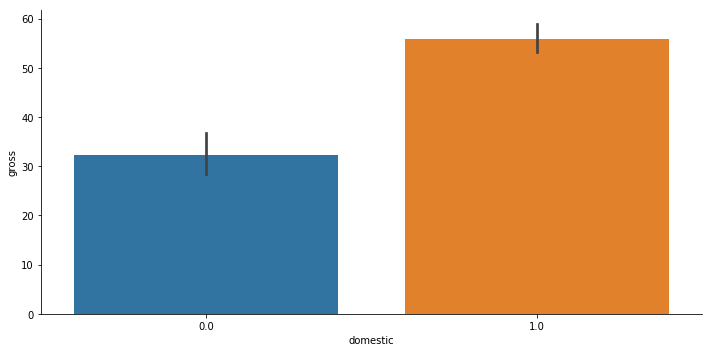

In [211]:
sns.catplot(x="domestic",y='gross',data=movies_cleaned,kind='bar', aspect=2)

Because they have higher budgests and return more - doesmtic movies will obviously gross more as shown above

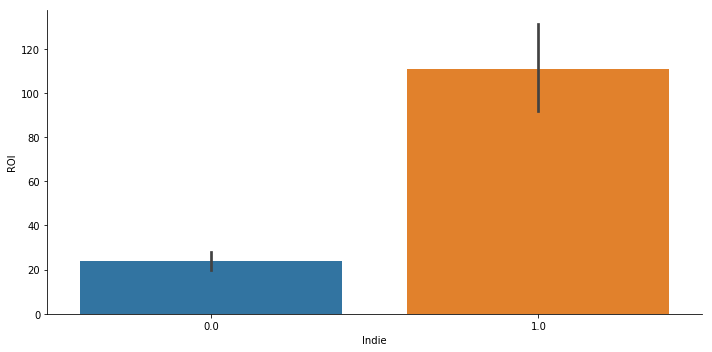

In [212]:
sns.catplot(x="Indie",y='ROI',data=movies_cleaned,kind='bar', aspect=2)

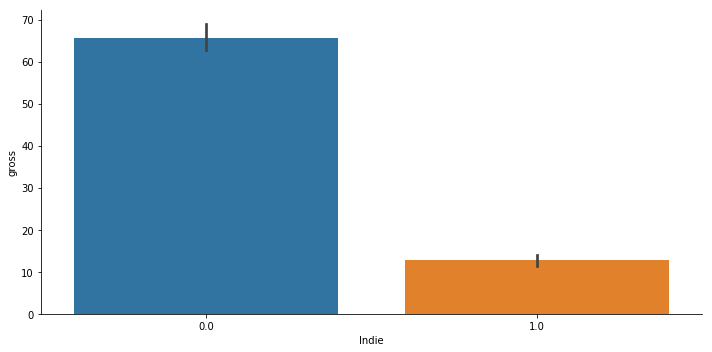

In [213]:
sns.catplot(x="Indie",y='gross',data=movies_cleaned,kind='bar', aspect=2)

Visual of ROI and Gross for Indie vs Big Budget

In [214]:
3527/20

176.35

In [215]:
movies['budget'].sum()

146797.50708399998

In [216]:
movies['gross'].sum()

179494.0

In [217]:
movies['budget'].sum()/20


7339.8753541999995

In [218]:
movies['gross'].sum()/20

8974.7

In [219]:
(movies['gross'].sum()-movies['budget'].sum())/20

1634.8246458000008

In [220]:
len(movies_cleaned[movies_cleaned['domestic']==0])

743

In [221]:
len(movies_cleaned[movies_cleaned['domestic']==1])

2760

In [222]:
movies_cleaned.corr()

,budget,gross,runtime,score,year,ROI,profit,domestic,Long,Indie
budget,1.000000,0.697192,0.324406,0.077202,0.108398,-0.126915,0.124417,0.099098,0.209969,-0.502133
gross,0.697192,1.000000,0.266929,0.219836,0.111463,0.263462,0.798057,0.134790,0.156794,-0.332341
runtime,0.324406,0.266929,1.000000,0.425390,0.024432,-0.063643,0.096772,-0.083045,0.737803,-0.209941
score,0.077202,0.219836,0.425390,1.000000,0.088226,0.134547,0.239380,-0.134812,0.361782,0.059473
year,0.108398,0.111463,0.024432,0.088226,1.000000,0.067644,0.063160,-0.059924,0.036298,0.001306
ROI,-0.126915,0.263462,-0.063643,0.134547,0.067644,1.000000,0.471333,0.106177,-0.053064,0.191194
profit,0.124417,0.798057,0.096772,0.239380,0.063160,0.471333,1.000000,0.103263,0.040525,-0.037918
domestic,0.099098,0.134790,-0.083045,-0.134812,-0.059924,0.106177,0.103263,1.000000,-0.048209,-0.099057
Long,0.209969,0.156794,0.737803,0.361782,0.036298,-0.053064,0.040525,-0.048209,1.000000,-0.188511
Indie,-0.502133,-0.332341,-0.209941,0.059473,0.001306,0.191194,-0.037918,-0.099057,-0.188511,1.000000


Gathering general facts about our dataset.  One high correlation is budget and gross. Meaning that the more money you spend on average the more money you will make with a movie.  Gross and profit are also significantly correlated but that just shows us that if a movie has grossed a high amount it also profited a high amount which makes a lot of sense. Also long and runtime are correlated but thats should be obvious with how we made the column long.

**Summarization**

We feel like we have sucessfully gone through this data set and extracted information that may not have been initially avaialable.  We added new columns to the data (ROI, domestic, indie) that give us have further insight into this dataset.  However, we were hoping to be able to find some interesting/strong correlations between the data within the entire set, but because there are seem to be none.  But, we did decide that potentially these low correlations mean that, in general, any given movie's performance in the market is hard to predict.